In [1]:
# Importamos todas las librerías necesarias
# ==============================================================================

import numpy as np#módulo para utilizar operaciones matemáticas
import pandas as pd#librería para manejar datos en formato dataframe
import matplotlib#librería de gráficos
from matplotlib import pyplot as plt#libería de gráficos
import seaborn as sns#librería de gráficos
sns.set()#establecemos el estilo de la librería seaborn

In [3]:
df = pd.read_csv(r'C:\Users\jdani\04_Proyecto_TFM\archive\full_df.csv')
df.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


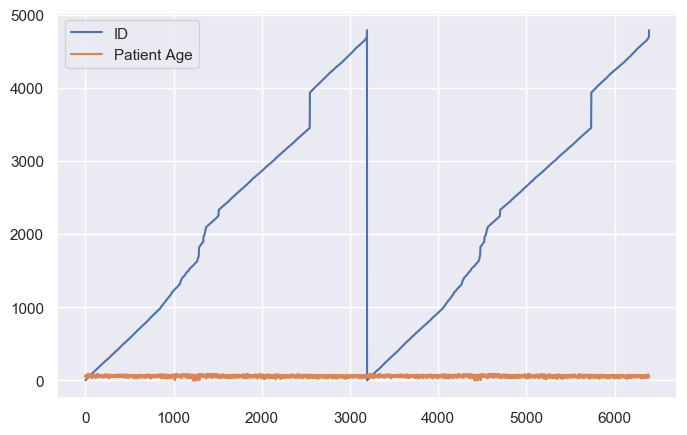

In [4]:
df[["ID","Patient Age"]].plot(figsize = (8,5))

In [28]:
df.shape

In [29]:
df.isnull().sum()/len(df)

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.10.0'

In [3]:
keras.__version__

'2.10.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [23]:
len(X_train_full[1])

28

In [24]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]


In [9]:
class_names = ["T-shit/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]] 

'Coat'

In [11]:
y_valid[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

In [15]:
X_valid.shape

(5000, 28, 28)

In [16]:
y_train.shape

(55000,)

In [17]:
print(X_valid.shape, X_train.shape, y_train.shape, y_valid.shape)

(5000, 28, 28) (55000, 28, 28) (55000,) (5000,)


In [18]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7411 - accuracy: 0.7565 - val_loss: 0.5218 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4923 - accuracy: 0.8298 - val_loss: 0.5075 - val_accuracy: 0.8208
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4449 - accuracy: 0.8436 - val_loss: 0.4097 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4163 - accuracy: 0.8549 - val_loss: 0.4158 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3956 - accuracy: 0.8613 - val_loss: 0.3925 - val_accuracy: 0.8640
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8651 - val_loss: 0.3885 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8717 - val_loss: 0.3866 - val_accuracy:

In [ ]:
'''pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(true)
plt.gca().set.ylim(0,1)
plt.show()'''

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(true)
plt.gca().set.ylim(0,1)
plt.show()

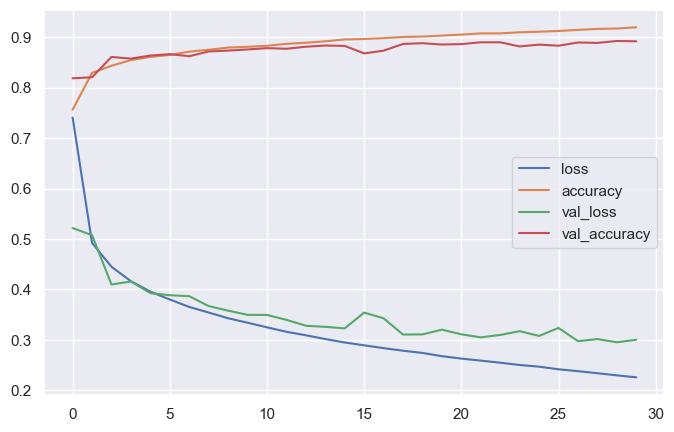

In [19]:
pd.DataFrame(history.history).plot(figsize = (8,5))

## Problema de regresión DL 

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform( X_test)

In [9]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model2.compile(loss = "mean_squared_error", optimizer = "sgd")

In [ ]:
zxczs